# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*



## Gradient Descent - example solution

Tasks: 

* 1/ Import data, define linear model and loss function;

* 2/ Define the gradients; 

* 3/ Define GD update function; 

* 4/ Set parametrs and run Gradient Descent;  

* 5/ Plot the model result. 

This Notebook demonstrates how gradient descent finds the solution to a linear regression problem. The illustration is done with pure Python code as well as with plots that show how the solution improves with iterations of the gradient descent algorithm.

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

C:\Users\uzivatel\AppData\Local\Temp\ipykernel_18392\1706525374.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data 

Use `data_gd.csv`,  fetature `f2` from the dataset. 


In [2]:
os.listdir()

['05_6_gradient_descent_linear_model_example.ipynb',
 '05_6_gradient_descent_linear_model_exercise.ipynb',
 'data_gd.csv']

In [3]:
# Adjust dir path as needed 
df = pd.read_csv('data_gd.csv', sep=',', header='infer')

In [4]:
x = df['f2']
y = df['y']

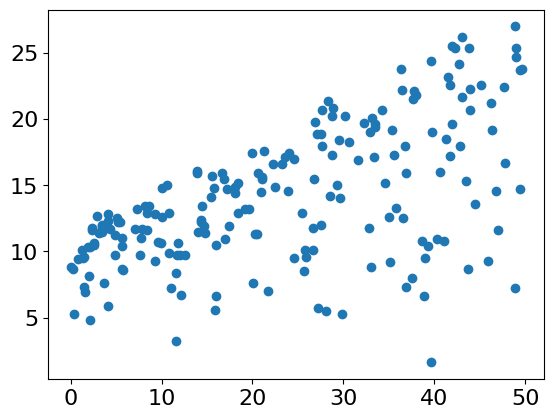

In [5]:
# Data plot 
plt.scatter(x, y)

### Task
We want to build a regression model that we can use to predict `y` based on other `x`values. Each row in the dataset represents one specific record. 
Imagine e.g. how glacier velocity flow increases with increase of seasonal temperature. Suppose the relationship is linear, for this case of illustaration. 

In [6]:
print("We have {} records to tranin the model.".format(x.size))

We have 200 records to tranin the model.


### Model: linear regression

Reminder: 
$$ 
    f(x) = wx + b
$$ 

where `x` is a vector of input features;
`y` is a vector of outputs (targets), also response variable; 
`b` is the bias term (intercept), also often abbreviated as w0
`w` is the weight(s) (direction of the linear model) 

We do not know what the optimal values of w and b are and we want to learn them from data! 



In [7]:
# Prediction model
def model(x, w, b):
    """Linear model
    """
    
    return w*x + b  

In [8]:
# Test the model function 
y_1 = model(x=3, w=0.5, b=0.1)
print(y_1)

1.6


### Loss function (MSE)

**The goal** is find such values of `w` and `b` that minimize the mean squre error (MSE)! 

$$
    Loss = L = \frac{1}{N} \sum_{i=1}^{N}(y_i - (wx_i + b))^2 
$$ 


In [9]:
# Define the loss function 
def loss(x, y, w, b):
    """Loss function (MSE)  
    """
    N = len(x)

    # Initialize loss
    total_error = 0.0 
    for i in range(N):
        total_error += (y[i] - (w*x[i] + b))**2

    return total_error / N 


In [10]:
# Test the loss function 
L_1 = loss(x=[3], y=[1.4], w=0.5, b=0.1)
print(round(L_1, 5))

0.04


### Set parameters

In [11]:
# Learning rate (here alpha) 
alpha = 0.001 

# Number of epochs to iterate 
epochs = 15000

### Model weights initialisation

In [12]:
# Initialization
w = 0.0
b = 0.0 

### Select subset of data

In [13]:
x_0 = x[0]

In [14]:
y_0 = y[0]

### Calcualte the gradinet

To find the partial derivative of the term $$(y_i - (wx + b))^2$$ **with respect to `w`** we apply the chain rule. Here, we have the chain 

$$f = f_2(f_1)$$

where 

$$f_1 = y_i - (wx + b)$$ and $$f_2 = f_1^2$$

To find a partial derivative of f with respect to w we have to first find the partial derivative of f with respect to f2 which is equal to 

$$2(yi - (wx + b))$$ 

based on 
$$ \frac{\partial f}{\partial x}x^2 = 2x$$ 

---

and the partial derivative of of the 
$$(y_i - (wx + b))$$ 
**with respect to `b`** is equal of $$-x$$

--- 

This results into two gradients

$$
\frac{\partial L}{\partial w}=\frac{1}{N} \sum_{i=1}^{N}(2\cdot(y_i - (wx_i + b))\cdot(-x_i);
$$ 

$$
\frac{\partial L}{\partial b}=\frac{1}{N} \sum_{i=1}^{N}(2\cdot(y_i - (wx_i + b))\cdot(-1);
$$ 



The gradient for a function is typically denoted with the symbol **$\nabla$** (nabla). 

  
$$
  \nabla(Loss) = \left[\begin{array}{cc}
                    \frac{-2}{N} \sum_{i=1}^{N}(y_i - (wx_i + b))\cdot(x_i) \\
                    \frac{-2}{N} \sum_{i=1}^{N}(y_i - (wx_i + b))
                 \end{array}\right]
$$ 


If we plug in some vlaues of `w`and `b`, e.g. initial 0 and 0, we get the gradient at the intial point. And with that we have to compute gradient for our function. 

In [15]:
# Gradients test calcualtion on sample of data (one point)
# i = 0

dr_dw = -2 * (y_0 - (w * x_0 + b)) * x_0
dr_db = -2 * (y_0 - (w * x_0 + b)) 
print(dr_dw, dr_db)

-1670.76 -44.2


### Update the model 

We update the model from initial state (or the previous state) by the gradient modulated by the learning rate papmeter. This is an important hyper-parameter of gradient descenttypicaly `α` (in Python code typically variable `lr` or `alpha`).  This parameter controls the size of the **update** of the model parameters: 

$$
    w \leftarrow w - \alpha\frac{\partial L}{\partial w}, 
$$

and 

$$
   b \leftarrow b - \alpha\frac{\partial L}{\partial b}. 
$$


We substract partial derivatives from the values of parameters because derivatives are indicators of growth of a function, while we want to minimize. 

In [16]:
# Define the update function

def update(x, y, w, b, alpha):
    """Update function, which returns updated parameters. 
    """
    dr_dw = 0.0
    dr_db = 0.0
    N = len(x)

    for i in range(N):
        dr_dw += -2 * x[i] * (y[i] - (w * x[i] + b))
        dr_db += -2 * (y[i] - (w * x[i] + b))

    # Update w and b
    w = w - (dr_dw/float(N)) * alpha
    b = b - (dr_db/float(N)) * alpha

    return w, b 

In [17]:
w_1, b_1 = update(x[0:1], y[0:1], w, b, alpha) 
print(f'The initial model weights are updated as follows w = {w_1} and b =  {b_1}')

The initial model weights are updated as follows w = 1.67076 and b =  0.0442


### Gradient descen 

The Gradien Descent algorithm performs iterative procedure **over the epochs** where we recalculate partial derivatives using the above function, update `w`nand `b`; we **continue the process until convergence**. 

In [18]:
# Define the gradient descent iterative function
# print the loss and updates on the parameters 

def gradient_descent(x, y, w, b, alpha, epochs):
    """Gradient descent process. 
    """

    counter = 0;
    for e in range(epochs):
        w, b = update(x, y, w, b, alpha)

        # Log the progress
        if (e == 0) or (e < 3000 and e % 200 == 0) or (e % 3000 == 0):
            print("epoch: ", str(e), "loss: "+str(loss(x, y, w, b)))
            print("w, b: ", w, b)
            print('---')
            # Plot the update 
            plt.figure(counter)
            axes = plt.gca()
            axes.set_xlim([0,50])
            axes.set_ylim([0,30])
            plt.scatter(x, y)
            X_plot = np.linspace(0,50,50)
            plt.plot(X_plot, X_plot*w + b, 'r-')
            counter += 1
    return w, b                

epoch:  0 loss: 92.32078294903626
w, b:  0.7412639000000002 0.028045000000000007
---
epoch:  200 loss: 37.862048354330014
w, b:  0.45585859223854625 1.031919370102584
---
epoch:  400 loss: 33.79131790081576
w, b:  0.4282720349432519 1.933428695950039
---
epoch:  600 loss: 30.558783668000206
w, b:  0.40368914715601384 2.7367802109372596
---
epoch:  800 loss: 27.9918542960729
w, b:  0.38178288442481695 3.4526614981614254
---
epoch:  1000 loss: 25.9534763777287
w, b:  0.36226181143284086 4.09059645918018
---
epoch:  1200 loss: 24.33481690722147
w, b:  0.34486622481754114 4.659072017562193
---
epoch:  1400 loss: 23.04945247215587
w, b:  0.32936469814353175 5.1656510267478115
---
epoch:  1600 loss: 22.028754937538633
w, b:  0.31555100306447775 5.617072884316986
---
epoch:  1800 loss: 21.21822725468694
w, b:  0.30324136571391785 6.019343191211091
---
epoch:  2000 loss: 20.57459375662496
w, b:  0.2922720218247468 6.3778136487118635
---
epoch:  2200 loss: 20.06348958511784
w, b:  0.28249703805

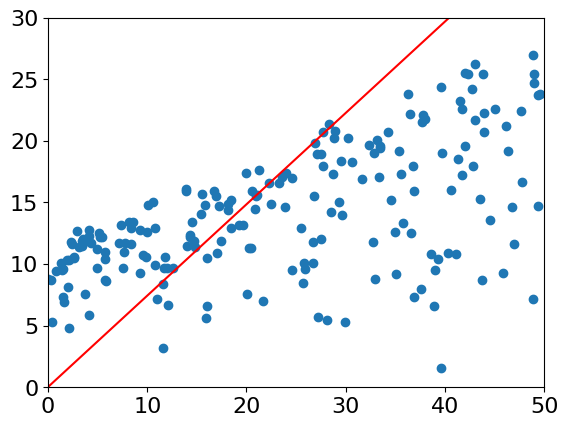

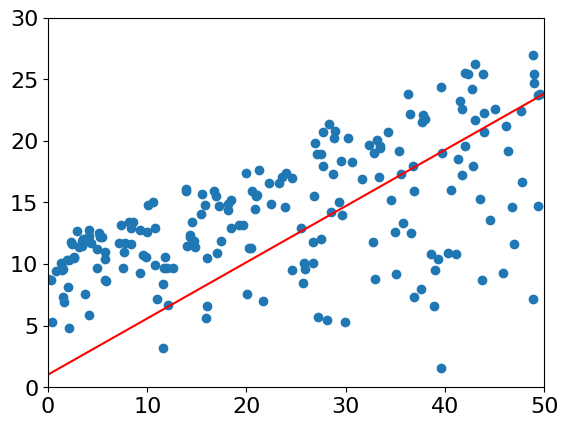

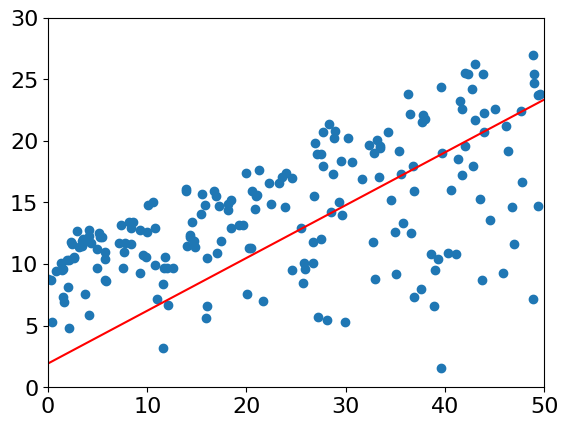

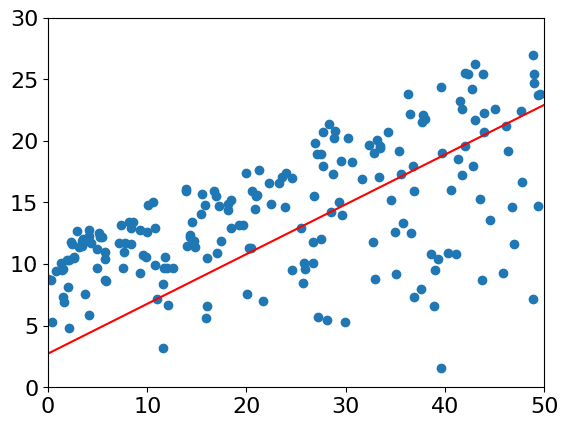

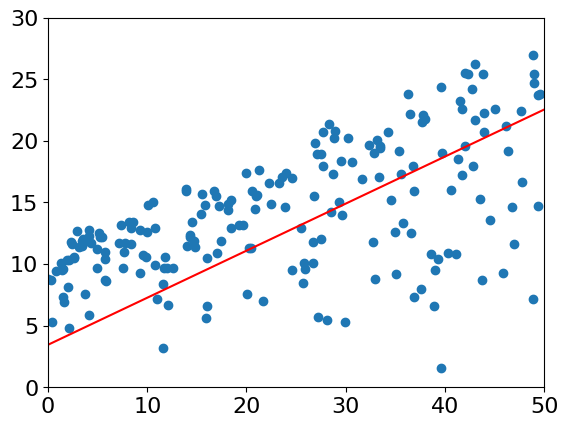

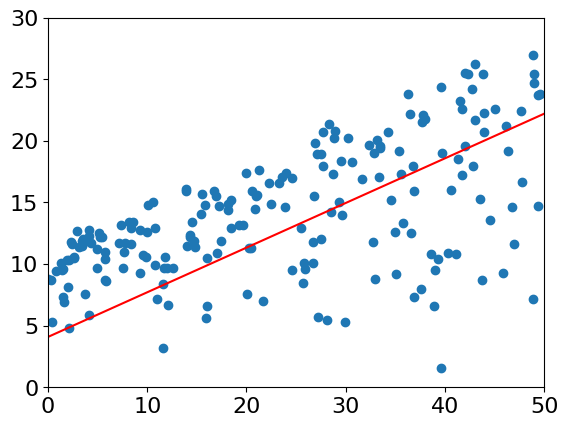

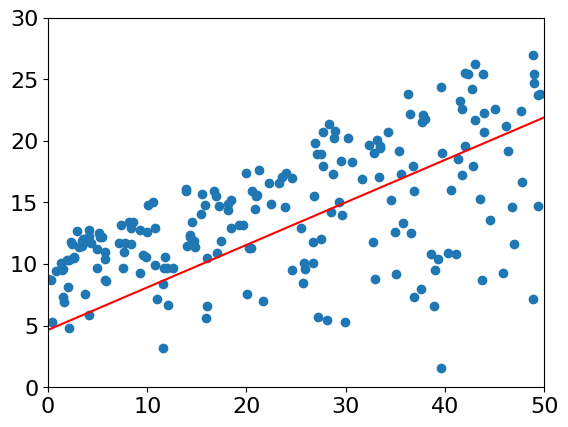

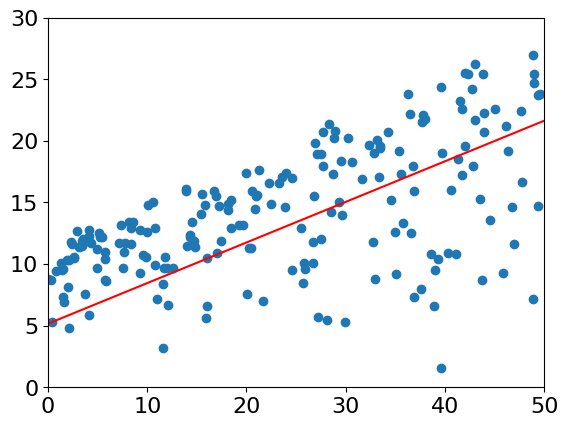

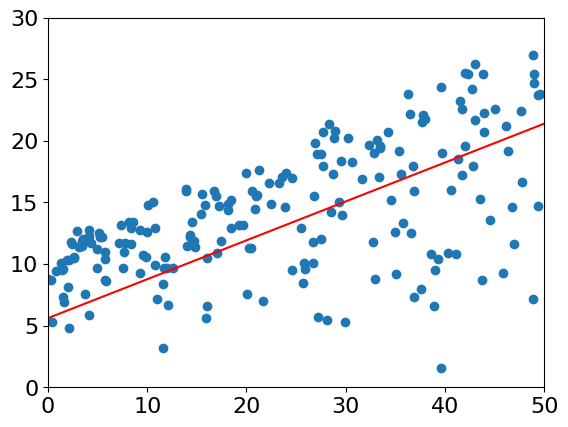

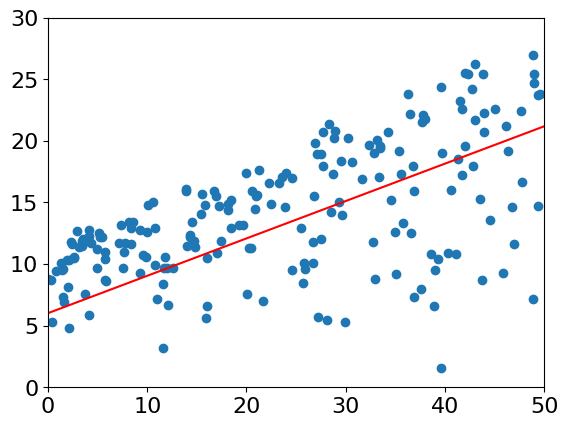

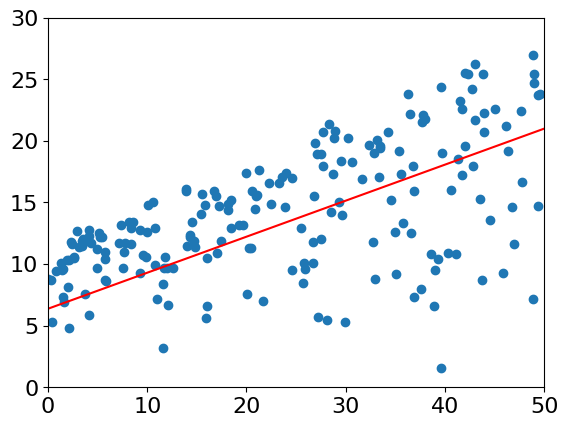

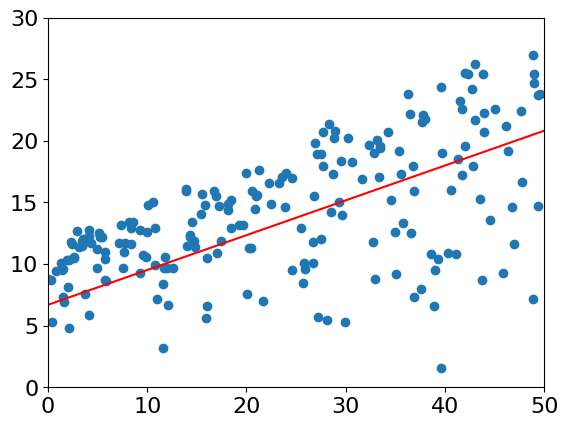

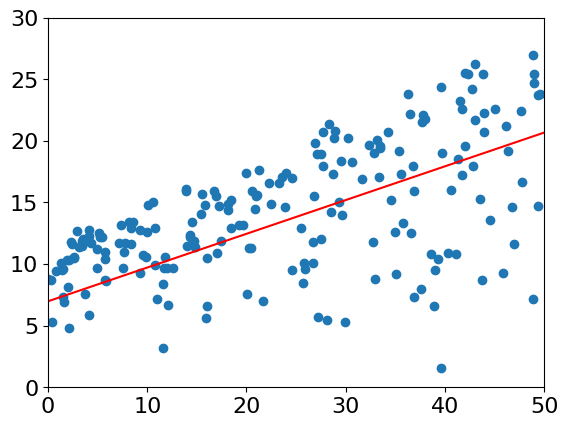

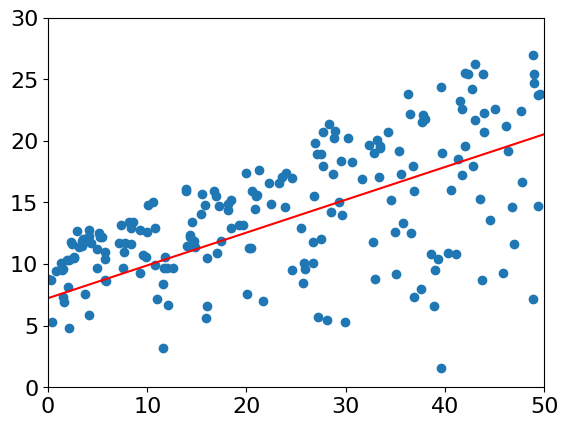

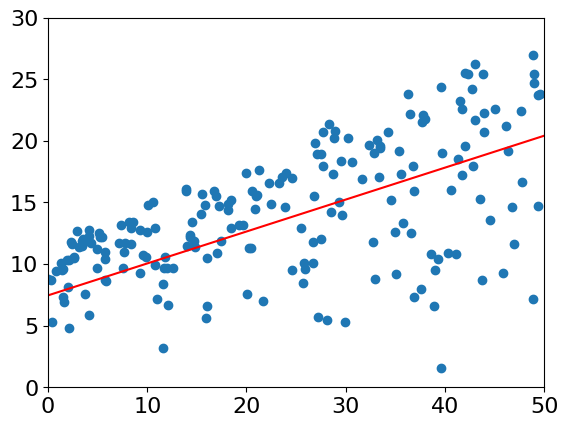

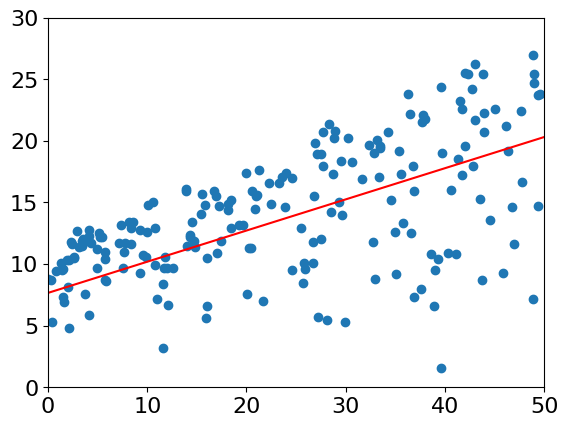

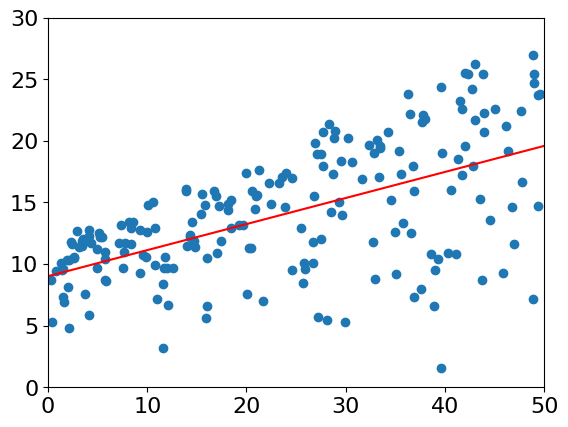

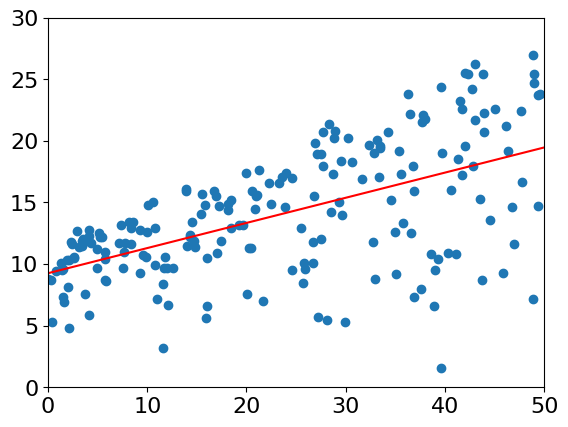

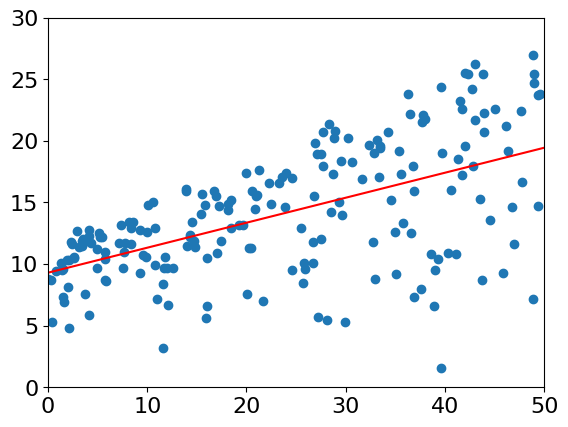

In [19]:
# Run the Gradient Descent algorithm
w, b = gradient_descent(x, y, w, b, alpha, epochs)
print('End of training!')

In [20]:
print('The final coeficients: {}, {}'.format(w, b)) 

The final coeficients: 0.20254581129464883, 9.310003218435126


### Model prediction 

In [21]:
x_new = 25.0
y_new = model(x_new, w, b)
print(y_new) 

14.373648500801346
